In [1]:
!python train.py --resume_run ./test_files/24_09_13-15_04_23-test_nyu_laptop_lin_mix_MIDAS/checkpoint/latest --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001

start at 2024-09-13 18:24:40.135508
Resume run: ./test_files/24_09_13-15_04_23-test_nyu_laptop_lin_mix_MIDAS/checkpoint/latest
 2024-09-13 18:24:40,159 - INFO -train.py - <module> >> device = cuda
 2024-09-13 18:24:49,847 - INFO -old_trainer.py - load_checkpoint >> Loading checkpoint from: ./test_files/24_09_13-15_04_23-test_nyu_laptop_lin_mix_MIDAS/checkpoint/latest
 2024-09-13 18:24:52,743 - INFO -old_trainer.py - load_checkpoint >> Net parameters are loaded from ./test_files/24_09_13-15_04_23-test_nyu_laptop_lin_mix_MIDAS/checkpoint/latest\net.pth
 2024-09-13 18:24:52,822 - INFO -old_trainer.py - load_checkpoint >> optimizer state is loaded from ./test_files/24_09_13-15_04_23-test_nyu_laptop_lin_mix_MIDAS/checkpoint/latest
 2024-09-13 18:24:52,822 - INFO -old_trainer.py - load_checkpoint >> LR scheduler state is loaded from ./test_files/24_09_13-15_04_23-test_nyu_laptop_lin_mix_MIDAS/checkpoint/latest
 2024-09-13 18:24:52,979 - INFO -old_trainer.py - load_checkpoint >> Checkpoint lo

Using cache found in C:\Users\micha/.cache\torch\hub\facebookresearch_WSL-Images_main
c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


In [22]:
# !python train.py --config ./config/test_nyu_laptop_lin_mix.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001
# !python train.py --config ./config/test_nyu_laptop_lin_mae.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001
# !python train.py --config ./config/test_nyu_laptop_lin_mse.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001

# !python train.py --config ./config/test_nyu_laptop_norm_mix.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001
# !python train.py --config ./config/test_nyu_laptop_norm_mae.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001
# !python train.py --config ./config/test_nyu_laptop_norm_mse.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001
# !python train.py --config ./config/test_nyu_laptop_dis_mix.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001
# !python train.py --config ./config/test_nyu_laptop_dis_mae.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001
# !python train.py --config ./config/test_nyu_laptop_dis_mse.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001
!python train.py --config ./config/test_nyu_laptop_lin_mix_MIDAS.yaml  --output_dir ./test_files --base_data_dir C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001

start at 2024-09-13 15:04:23.862290
 2024-09-13 15:04:23,903 - INFO -train.py - <module> >> device = cuda
 2024-09-13 15:04:23,914 - INFO -train.py - <module> >> Config saved to ./test_files\24_09_13-15_04_23-test_nyu_laptop_lin_mix_MIDAS\config.yaml
 2024-09-13 15:04:23,995 - INFO -train.py - <module> >> Code snapshot saved to: ./test_files\24_09_13-15_04_23-test_nyu_laptop_lin_mix_MIDAS\code_snapshot.tar
 2024-09-13 15:04:29,402 - INFO -old_trainer.py - train_and_validate >> Start training
 2024-09-13 15:55:16,390 - INFO -old_trainer.py - train_and_validate >> Training ended. Training time: 50m 47s


'rsync' is not recognized as an internal or external command,
operable program or batch file.
tar: : Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.
'rm' is not recognized as an internal or external command,
operable program or batch file.
Using cache found in C:\Users\micha/.cache\torch\hub\facebookresearch_WSL-Images_main
c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 182.00 MiB. GPU  (Triggered internally at ..\aten\src\ATen\native\cud

In [1]:
import argparse
import logging

import os
import shutil
from datetime import datetime, timedelta
from typing import List

import torch
from omegaconf import OmegaConf
from torch.utils.data import ConcatDataset, DataLoader
from tqdm import tqdm

from models.MiDas import MidasNet
from models.TernausNet import UNet16 

from datasets import BaseDepthDataset, DatasetMode, get_dataset
from datasets.mixed_sampler import MixedBatchSampler
from trainers.mytrainer import NetTrainer
from util.config_util import (
    find_value_in_omegaconf,
    recursive_load_config,
)
from util.depth_transform import (
    DepthNormalizerBase,
    get_depth_normalizer,
)
from util.logging_util import(
  config_logging
)
from util.alignment import depth2disparity, align_depth_least_square

c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
t_start = datetime.now()
print(f"start at {t_start}")
# -------------------- Arguments --------------------
class argumenty():
    def __init__(self) -> None:
        self.config = './config/test_nyu_laptop.yaml'
        self.resume_run = './test_files/24_09_04-02_27_19-test_nyu_laptop_mixloss/checkpoint/latest'
        self.output_dir = './test_files'
        self.no_cuda = False
        self.exit_after = -1
        self.base_data_dir = "C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001"
        self.add_datetime_prefix = True
        
args = argumenty()
resume_run = args.resume_run
output_dir = args.output_dir
base_data_dir = (
    args.base_data_dir
    if args.base_data_dir is not None
    else os.environ["BASE_DATA_DIR"]
)
# -------------------- Initialization --------------------
# Resume previous run
if resume_run is not None:
    print(f"Resume run: {resume_run}")
    out_dir_run = os.path.dirname(os.path.dirname(resume_run))
    job_name = os.path.basename(out_dir_run)
    # Resume config file
    cfg = OmegaConf.load(os.path.join(out_dir_run, "config.yaml"))
else:
    # Run from start
    cfg = recursive_load_config(args.config)
    # Full job name
    pure_job_name = os.path.basename(args.config).split(".")[0]
    # Add time prefix
    if args.add_datetime_prefix:
        job_name = f"{t_start.strftime('%y_%m_%d-%H_%M_%S')}-{pure_job_name}"
    else:
        job_name = pure_job_name
    # Output dir
    if output_dir is not None:
        out_dir_run = os.path.join(output_dir, job_name)
    else:
        out_dir_run = os.path.join("./output", job_name)
    os.makedirs(out_dir_run, exist_ok=False)
# Other directories
out_dir_ckpt = os.path.join(out_dir_run, "checkpoint")
if not os.path.exists(out_dir_ckpt):
    os.makedirs(out_dir_ckpt)
out_dir_tr = os.path.join(out_dir_run, "training_record")
if not os.path.exists(out_dir_tr):
    os.makedirs(out_dir_tr)
out_dir_eval = os.path.join(out_dir_run, "evaluation_record")
if not os.path.exists(out_dir_eval):
    os.makedirs(out_dir_eval)
# -------------------- Logging settings --------------------
config_logging(cfg.logging, out_dir=out_dir_run)
logging.debug(f"config: {cfg}")
# -------------------- Device --------------------
cuda_avail = torch.cuda.is_available() and not args.no_cuda
device = torch.device("cuda" if cuda_avail else "cpu")
logging.info(f"device = {device}")
# -------------------- Snapshot of code and config --------------------
if resume_run is None:
    _output_path = os.path.join(out_dir_run, "config.yaml")
    with open(_output_path, "w+") as f:
        OmegaConf.save(config=cfg, f=f)
    logging.info(f"Config saved to {_output_path}")
    # Copy and tar code on the first run
    _temp_code_dir = os.path.join(out_dir_run, "code_tar")
    _code_snapshot_path = os.path.join(out_dir_run, "code_snapshot.tar")
    os.system(
        f"rsync --relative -arhvz --quiet --filter=':- .gitignore' --exclude '.git' . '{_temp_code_dir}'"
    )
    os.system(f"tar -cf {_code_snapshot_path} {_temp_code_dir}")
    os.system(f"rm -rf {_temp_code_dir}")
    logging.info(f"Code snapshot saved to: {_code_snapshot_path}")
# -------------------- Data --------------------
loader_seed = cfg.dataloader.seed
if loader_seed is None:
    loader_generator = None
else:
    loader_generator = torch.Generator().manual_seed(loader_seed)
# Training dataset
depth_transform: DepthNormalizerBase = get_depth_normalizer(
    cfg_normalizer=cfg.depth_normalization
)
train_dataset: BaseDepthDataset = get_dataset(
    cfg.dataset.train,
    base_data_dir=base_data_dir,
    mode=DatasetMode.TRAIN,
    augmentation_args=cfg.augmentation_args,
    depth_transform=depth_transform,
    gt_depth_type=cfg.gt_depth_type
)
logging.debug("Augmentation: ", cfg.augmentation_args)
if "mixed" == cfg.dataset.train.name:
    dataset_ls = train_dataset
    assert len(cfg.dataset.train.prob_ls) == len(
        dataset_ls
    ), "Lengths don't match: `prob_ls` and `dataset_list`"
    concat_dataset = ConcatDataset(dataset_ls)
    mixed_sampler = MixedBatchSampler(
        src_dataset_ls=dataset_ls,
        batch_size=cfg.dataloader.train_batch_size,
        drop_last=True,
        prob=cfg.dataset.train.prob_ls,
        shuffle=True,
        generator=loader_generator,
    )
    train_loader = DataLoader(
        concat_dataset,
        batch_sampler=mixed_sampler,
        num_workers=cfg.dataloader.num_workers,
        pin_memory=cfg.dataloader.pin_memory, 
    )
else:
    train_loader = DataLoader(
        dataset=train_dataset,
        batch_size=cfg.dataloader.train_batch_size,
        num_workers=cfg.dataloader.num_workers,
        shuffle=True,
        generator=loader_generator,
        pin_memory=cfg.dataloader.pin_memory,
    )
# Validation dataset
val_dataset: BaseDepthDataset = get_dataset(
    cfg.dataset.val,
    base_data_dir=base_data_dir,
    mode=DatasetMode.TRAIN,
    depth_transform=depth_transform,
    gt_depth_type=cfg.gt_depth_type
)
if "mixed" == cfg.dataset.val.name:
    dataset_ls = val_dataset
    assert len(cfg.dataset.val.prob_ls) == len(
        dataset_ls
    ), "Lengths don't match: `prob_ls` and `dataset_list`"
    concat_dataset = ConcatDataset(dataset_ls)
    mixed_sampler = MixedBatchSampler(
        src_dataset_ls=dataset_ls,
        batch_size=cfg.dataloader.val_batch_size,
        drop_last=True,
        prob=cfg.dataset.val.prob_ls,
        shuffle=False,
        generator=loader_generator,
    )
    val_loader = DataLoader(
        concat_dataset,
        batch_sampler=mixed_sampler,
        num_workers=cfg.dataloader.num_workers,
        pin_memory=cfg.dataloader.pin_memory,
    )
else:
    val_loader = DataLoader(
        dataset=val_dataset,
        batch_size=cfg.dataloader.val_batch_size,
        num_workers=cfg.dataloader.num_workers,
        shuffle=False,
        generator=loader_generator,
        pin_memory=cfg.dataloader.pin_memory,
    )
# Test dataset
test_loaders: List[DataLoader] = []
for _test_dic in cfg.dataset.test:
    _test_dataset = get_dataset(
        _test_dic,
        base_data_dir=base_data_dir,
        mode=DatasetMode.TRAIN,
        depth_transform=depth_transform,
        gt_depth_type=cfg.gt_depth_type
    )
    _test_loader = DataLoader(
        dataset=_test_dataset,
        batch_size=cfg.dataloader.test_batch_size,
        shuffle=False,
        num_workers=cfg.dataloader.num_workers,
        pin_memory=cfg.dataloader.pin_memory,
    )
    test_loaders.append(_test_loader)
# -------------------- Model --------------------
if cfg.model.name == 'TernausNet':
    model = UNet16(pretrained=True, is_deconv=True)
elif cfg.model.name == 'MiDas':
  model = MidasNet(backbone=cfg.model.backbone)
else:
  raise NotImplementedError 
# -------------------- Trainer --------------------
# Exit time
if args.exit_after > 0:
    t_end = t_start + timedelta(minutes=args.exit_after)
    logging.info(f"Will exit at {t_end}")
else:
    t_end = None
logging.debug(f"Trainer: treiner_nets")
trainer = NetTrainer(
    cfg=cfg,
    model=model,
    train_dataloader=train_loader,
    device=device,
    out_dir_ckpt=out_dir_ckpt,
    out_dir_tr=out_dir_tr,
    out_dir_eval=out_dir_eval,
    val_dataloader=val_loader,
    test_dataloaders=test_loaders,
)
# -------------------- Checkpoint --------------------
if resume_run is not None:
    trainer.load_checkpoint(
        resume_run, load_trainer_state=True, resume_lr_scheduler=True
    )
# -------------------- Training & Evaluation Loop --------------------
# try:
#     trainer.train(t_end=t_end)
# except Exception as e:
#     logging.exception(e)

c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in C:\Users\micha/.cache\torch\hub\facebookresearch_WSL-Images_main
c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Trig

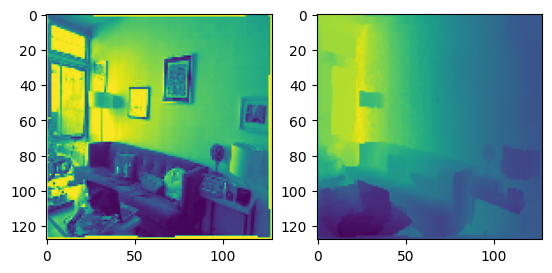

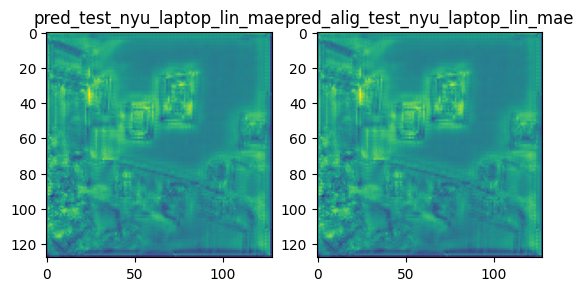

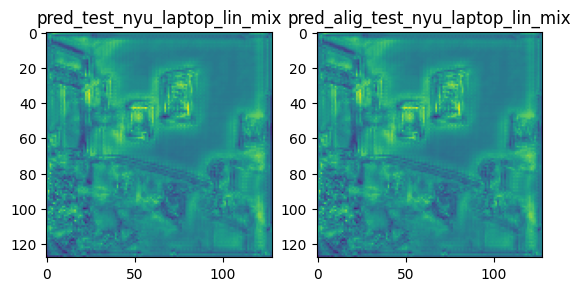

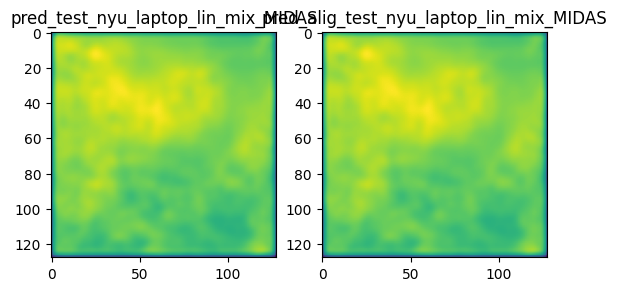

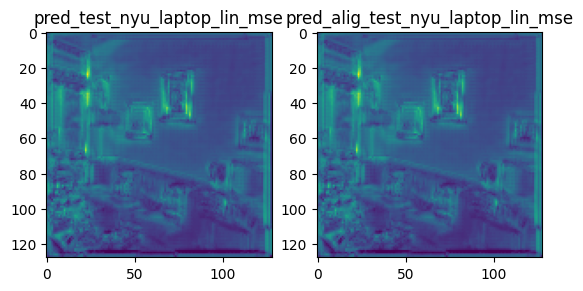

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import glob
import torch
from util.config_util import recursive_load_config
from datasets import DatasetMode, get_dataset
from torch.utils.data import DataLoader
from models.MiDas import MidasNet
from models.TernausNet import UNet16
from util.depth_transform import (
    DepthNormalizerBase,
    get_depth_normalizer,
)
from util.alignment import align_depth_least_square


def imgshow(inp, title=None, pred=False):
    inp = inp.numpy().transpose((1, 2, 0))
    if not pred:
        mean = np.array([0.48012177, 0.41071795, 0.39187136])
        std = np.array([0.28875302, 0.29516797, 0.30792887])
        inp = std * inp + mean
        inp = np.clip(inp, 0, 1)
        plt.imshow(inp)
    else:
        plt.imshow(inp, cmap='viridis')
    plt.axis("off")
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

config_list = glob.glob('./config/test_nyu_laptop_lin*.yaml')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for i, conf in enumerate(config_list):
    cfg = recursive_load_config(conf)
    # Training dataset
    depth_transform: DepthNormalizerBase = get_depth_normalizer(
        cfg_normalizer=cfg.depth_normalization
    )

    test_loaders = []
    for _test_dic in cfg.dataset.test:
        _test_dataset = get_dataset(
            _test_dic,
            base_data_dir='C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001',
            mode=DatasetMode.TRAIN,
            gt_depth_type=cfg.gt_depth_type,
            depth_transform=depth_transform,
        )
        _test_loader = DataLoader(
            dataset=_test_dataset,
            batch_size=8,
            shuffle=False,
            num_workers=cfg.dataloader.num_workers,
            pin_memory=cfg.dataloader.pin_memory,
        )
        test_loaders.append(_test_loader)
    
    # -------------------- Model --------------------
    if cfg.model.name == 'TernausNet':
        model = UNet16(pretrained=True, is_deconv=True)
    elif cfg.model.name == 'MiDas':
      model = MidasNet(backbone=cfg.model.backbone)
    else:
      raise NotImplementedError
    
    best_path = glob.glob('./test_files/*'+conf.split('\\')[-1].split('.')[-2]+'/checkpoint/latest/best_net.pth')
    model.load_state_dict(
        torch.load(best_path[0], map_location=device)
    )
    model.to(device)
    
    batch = next(iter(test_loaders[0]))
    
    # if i == 0:
        # plt.figure(figsize=(16,24))
        # grid_imgs = torchvision.utils.make_grid(batch['rgb_img'])
        # imgshow(grid_imgs, title='raw')
        # plt.figure(figsize=(16,24))
        # grid_imgs = torchvision.utils.make_grid(batch['depth_raw_linear'], normalize=True)
        # imgshow(grid_imgs, pred=True, title='gt')

    # pred_samples = model(batch['rgb_img'].to(device))
    # pred_samples_a = align_depth_least_square(batch['depth_raw_linear'], pred_samples.detach().cpu(), batch['valid_mask_raw'], return_scale_shift=False)
    # plt.figure(figsize=(16,24))
    # grid_imgs = torchvision.utils.make_grid(pred_samples.cpu(), normalize=True)
    # imgshow(grid_imgs, pred=True, title='pred'+conf.split('\\')[-1].split('.')[-2])

    # plt.figure(figsize=(16,24))
    # grid_imgs = torchvision.utils.make_grid(pred_samples_a, normalize=True)
    # imgshow(grid_imgs, pred=True, title='pred_alig'+conf.split('\\')[-1].split('.')[-2])
    # torch.cuda.empty_cache()
    
    if i == 0:
        fig, (a1,a2) = plt.subplots(1,2)
        a1.imshow(batch['rgb_img'][0][0])
        a2.imshow(batch['depth_raw_linear'][0][0])
        
    pred = model(batch['rgb_img'][0].unsqueeze(0).to(device))
    pred_a = align_depth_least_square(batch['depth_raw_linear'][0].unsqueeze(0), pred.detach().cpu(), batch['valid_mask_raw'][0].unsqueeze(0), return_scale_shift=False)

    fig, (a1,a2) = plt.subplots(1,2)
    a1.imshow(pred.detach().cpu().numpy()[0][0])
    a1.title.set_text('pred_'+conf.split('\\')[-1].split('.')[-2])
    a2.imshow(pred_a[0][0])
    a2.title.set_text('pred_alig_'+conf.split('\\')[-1].split('.')[-2])

    torch.cuda.empty_cache()

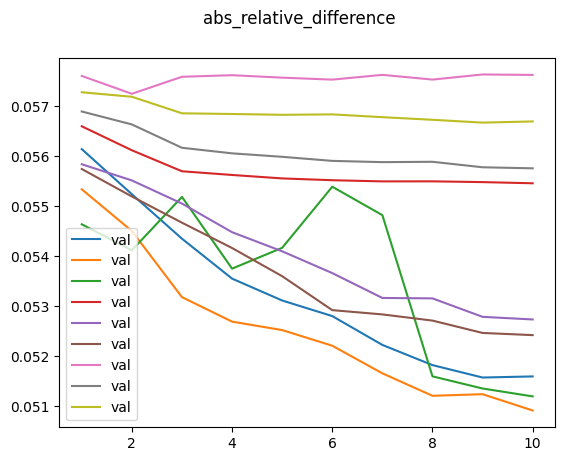

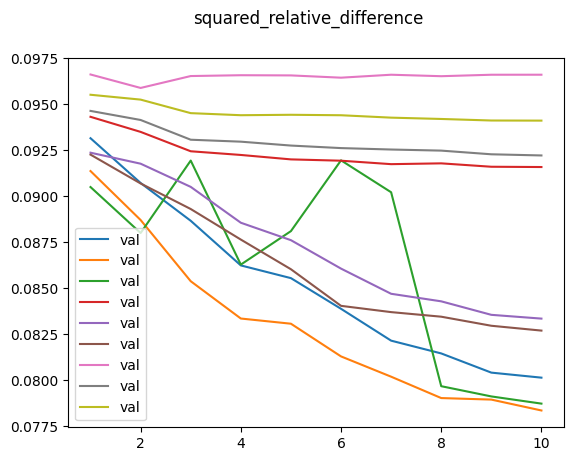

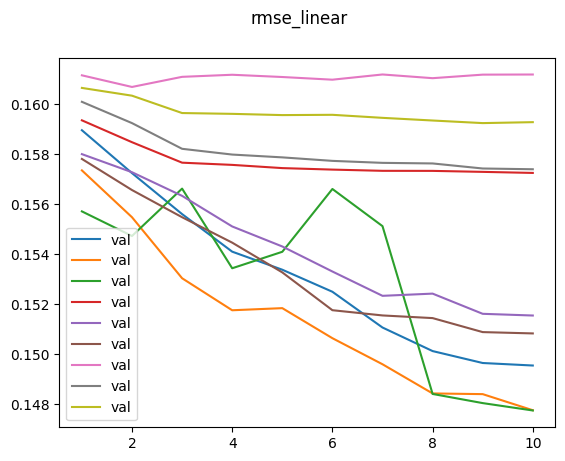

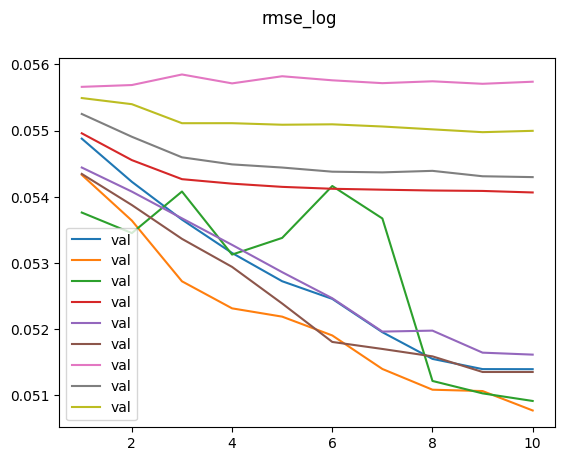

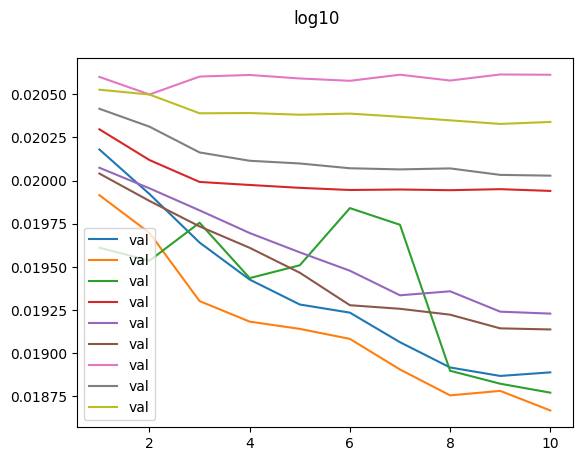

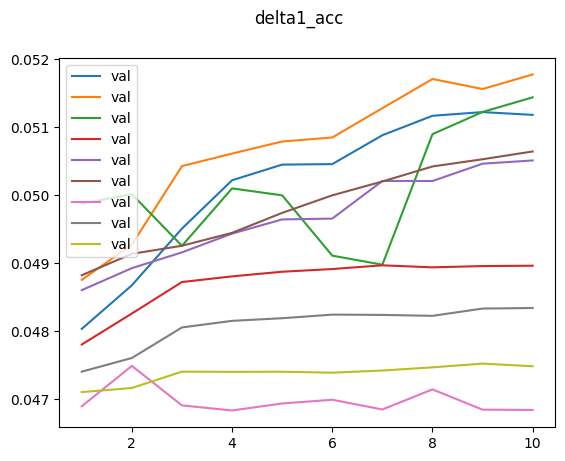

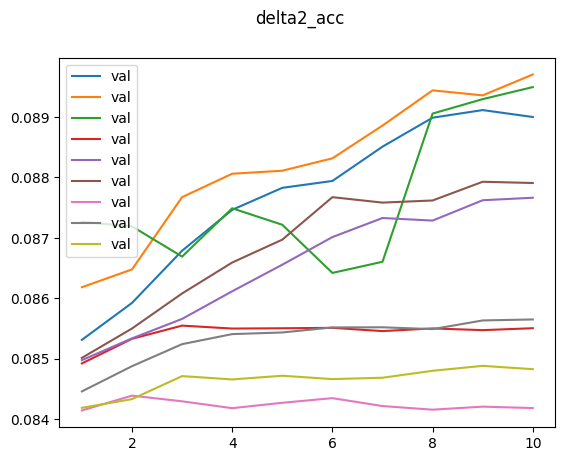

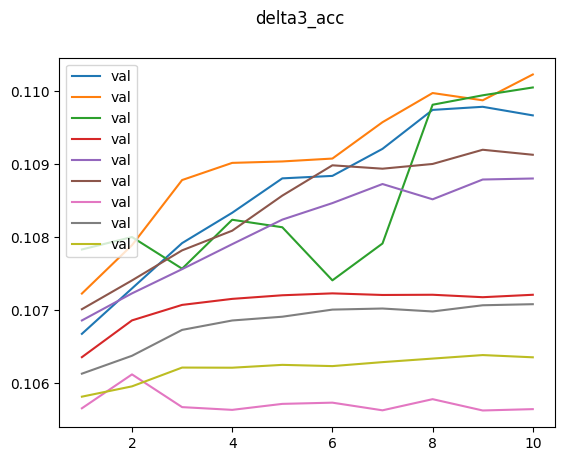

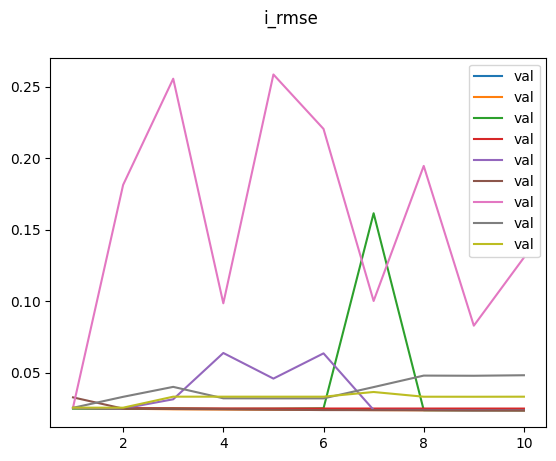

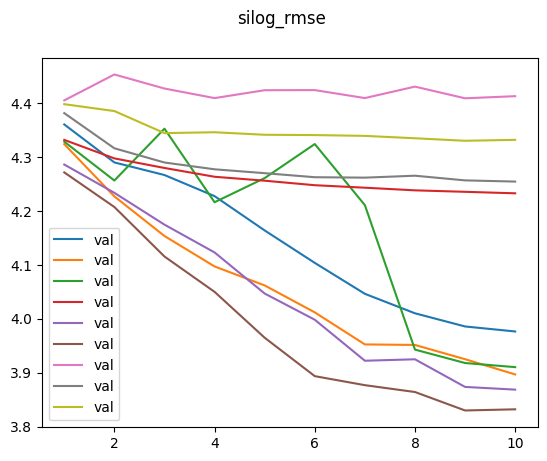

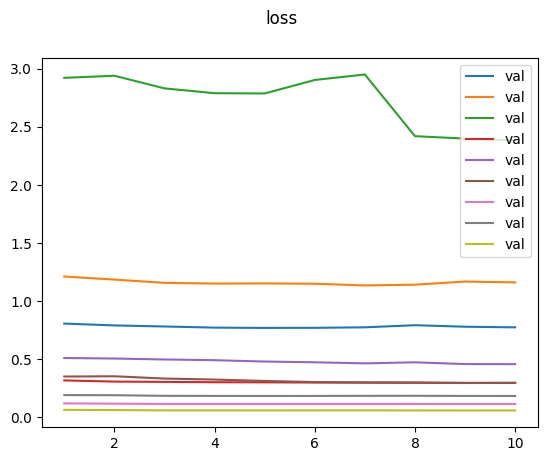

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

tr_list = glob.glob('./test_files/*test_nyu_laptop*/*/train*.csv')
vl_list = glob.glob('./test_files/*test_nyu_laptop*/*/val*.csv')


tr0 = pd.read_csv(tr_list[0])


for name in tr0.columns[1:]:
    f, ax1 = plt.subplots(1,1)
    f.suptitle(name)
    for i in range(len(tr_list)):
        tr = pd.read_csv(tr_list[i])
        vl = pd.read_csv(vl_list[i])
        # ax1.plot(tr['epoch'], tr[name], label = 'train')
        ax1.plot(vl['epoch'], vl[name], label = 'val')
        ax1.legend()
    plt.show()

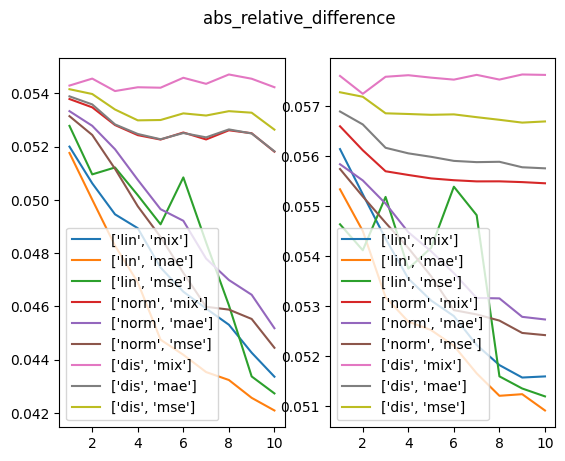

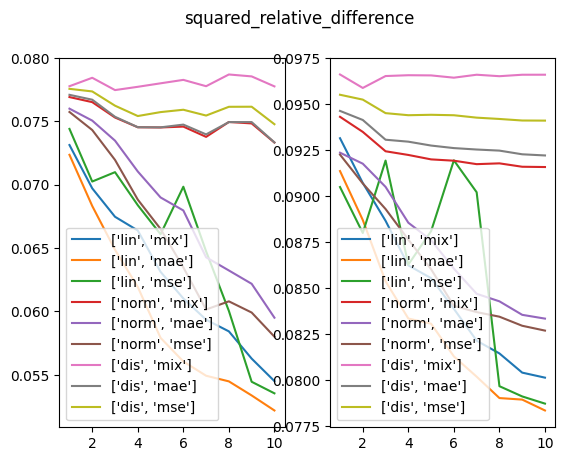

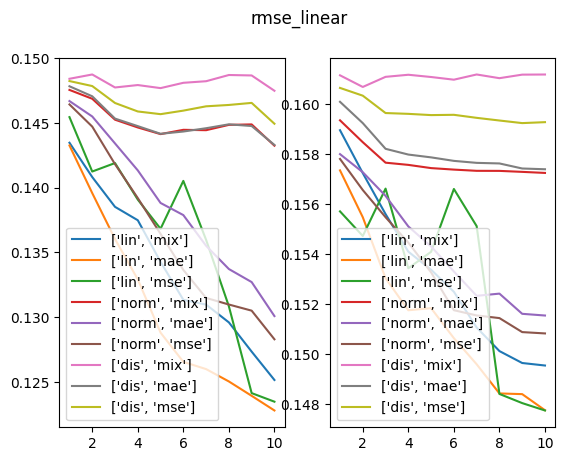

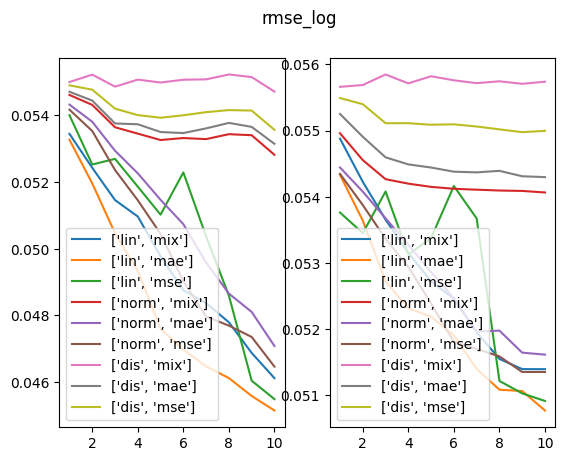

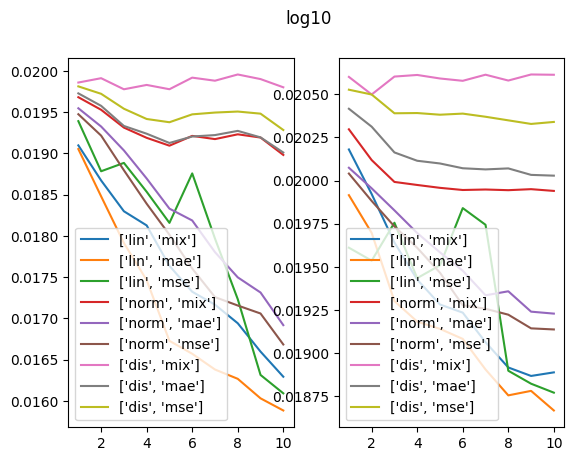

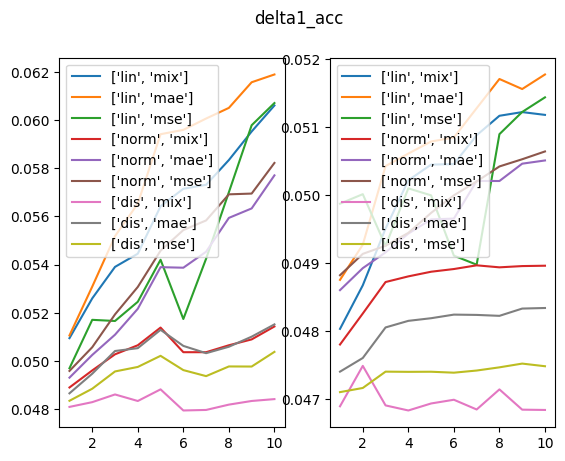

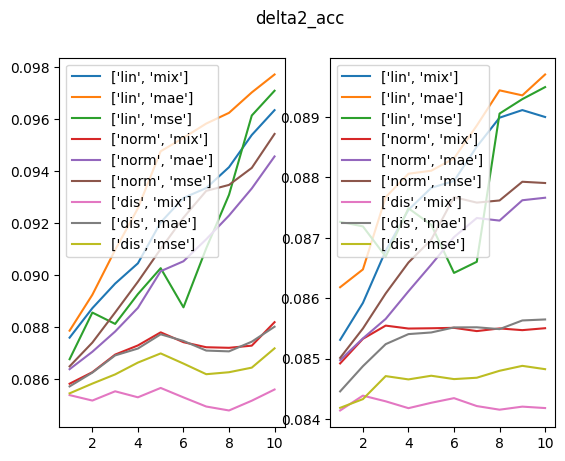

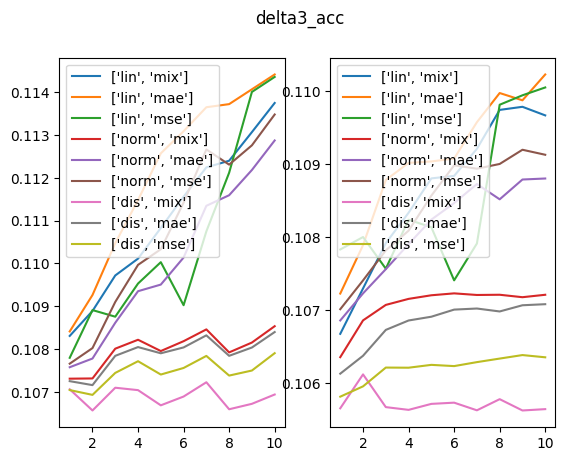

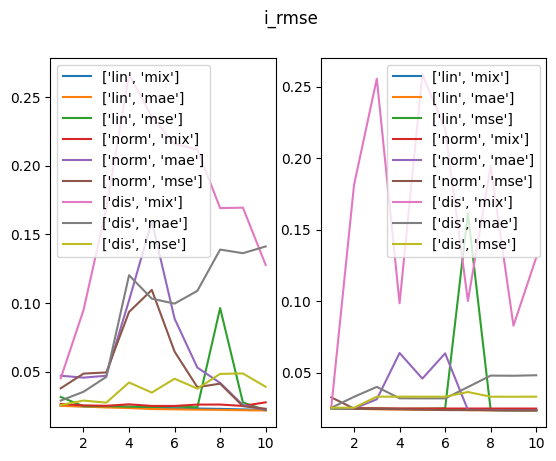

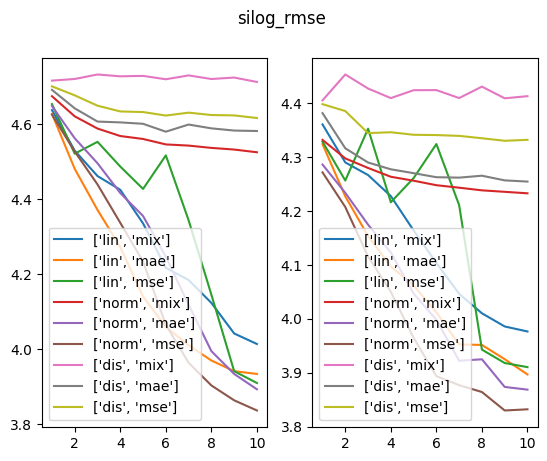

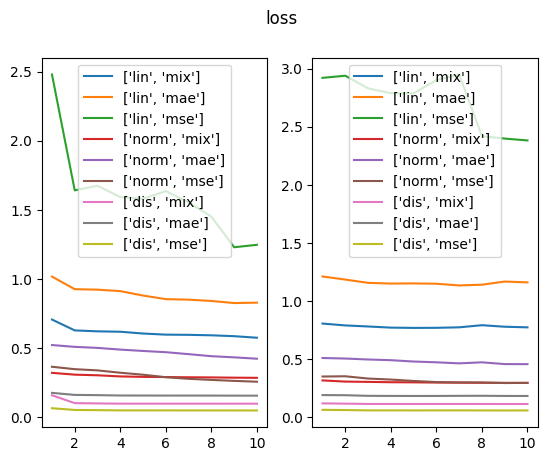

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

tr_list = glob.glob('./test_files/*test_nyu_laptop*/*/train*.csv')
vl_list = glob.glob('./test_files/*test_nyu_laptop*/*/val*.csv')


tr0 = pd.read_csv(tr_list[0])


for name in tr0.columns[1:]:
    f, (a1,a2) = plt.subplots(1,2)
    f.suptitle(name)
    for i in range(len(tr_list)):
        tr = pd.read_csv(tr_list[i])
        vl = pd.read_csv(vl_list[i])
        a1.plot(tr['epoch'], tr[name], label = tr_list[i].split('\\')[-3].split('_')[7:])
        a2.plot(vl['epoch'], vl[name], label = vl_list[i].split('\\')[-3].split('_')[7:])
        a1.legend()
        a2.legend()
    plt.show()

In [1]:
from util.config_util import recursive_load_config
from datasets import DatasetMode, get_dataset
from torch.utils.data import DataLoader
from util.depth_transform import (
    DepthNormalizerBase,
    get_depth_normalizer,
)
from models.MiDas import MidasNet
import glob
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cfg = recursive_load_config('./config/test_nyu_laptop_lin_mix_MIDAS.yaml')
# Training dataset
depth_transform: DepthNormalizerBase = get_depth_normalizer(
    cfg_normalizer=cfg.depth_normalization
)
test_loaders = []
for _test_dic in cfg.dataset.test:
    _test_dataset = get_dataset(
        _test_dic,
        base_data_dir='C:/Users/micha/Downloads/nyu_v2-20240826T235024Z-001',
        mode=DatasetMode.TRAIN,
        gt_depth_type=cfg.gt_depth_type,
        depth_transform=depth_transform,
    )
    _test_loader = DataLoader(
        dataset=_test_dataset,
        batch_size=8,
        shuffle=False,
        num_workers=cfg.dataloader.num_workers,
        pin_memory=cfg.dataloader.pin_memory,
    )
    test_loaders.append(_test_loader)

model = MidasNet(backbone=cfg.model.backbone)
best_path = glob.glob('./test_files/*test_nyu_laptop_lin_mix_MIDAS/checkpoint/latest/best_net.pth')
model.load_state_dict(
    torch.load(best_path[0], map_location=device)
)
model.to(device)


c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in C:\Users\micha/.cache\torch\hub\facebookresearch_WSL-Images_main


MidasNet(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inpla

In [2]:
import numpy as np
import torch
import torch.nn as nn


class GELoss():
    def __init__(self, batch_reduction=True):
        self.batch_reduction = batch_reduction
    
    def __call__(self, depth_pred, depth_gt, valid_mask):
        d_diff = depth_pred - depth_gt
        d_diff = torch.mul(d_diff, valid_mask)
        v_gradient = torch.abs(d_diff[:,:,0:-2, :] - d_diff[:,:,2:, :])
        v_mask = torch.mul(valid_mask[:,:,0:-2, :], valid_mask[:,:,2:, :])
        v_gradient = torch.mul(v_gradient, v_mask)
        h_gradient = torch.abs(d_diff[:,:,:, 0:-2] - d_diff[:,:,:, 2:])
        h_mask = torch.mul(valid_mask[:,:,:, 0:-2], valid_mask[:,:,:, 2:])
        h_gradient = torch.mul(h_gradient, h_mask)
        gradient_loss = h_gradient.sum() + v_gradient.sum()
        valid_num = torch.sum(h_mask) + torch.sum(v_mask)
        gradient_loss = gradient_loss / (valid_num + 1e-8)
        if self.batch_reduction:
            gradient_loss = gradient_loss.mean()
        return gradient_loss
    

def imgrad(img):
    img = torch.mean(img, 1, True)
    fx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    conv1 = nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
    weight = torch.from_numpy(fx).float().unsqueeze(0).unsqueeze(0)
    if img.is_cuda:
        weight = weight.cuda()
    conv1.weight = nn.Parameter(weight)
    grad_x = conv1(img)

    fy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    conv2 = nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
    weight = torch.from_numpy(fy).float().unsqueeze(0).unsqueeze(0)

    if img.is_cuda:
        weight = weight.cuda()

    conv2.weight = nn.Parameter(weight)
    grad_y = conv2(img)
    return grad_y, grad_x

def imgrad_loss(pred, gt, mask=None):
    N,C,_,_ = pred.size()
    grad_y, grad_x = imgrad(pred)
    grad_y_gt, grad_x_gt = imgrad(gt)
    grad_y_diff = torch.abs(grad_y - grad_y_gt)
    grad_x_diff = torch.abs(grad_x - grad_x_gt)
    if mask is not None:
        grad_y_diff[~mask] = 0.1*grad_y_diff[~mask]
        grad_x_diff[~mask] = 0.1*grad_x_diff[~mask]
    return (torch.mean(grad_y_diff) + torch.mean(grad_x_diff))


In [3]:
batch = next(iter(test_loaders[0]))
pred = model(batch['rgb_img'].to(device))

print(GELoss()(pred, batch['depth_raw_linear'].to(device), batch['valid_mask_raw'].to(device)))
print(imgrad_loss(pred, batch['depth_raw_linear'].to(device), batch['valid_mask_raw'].to(device)))

c:\Users\micha\anaconda3\envs\pytorch-env\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


tensor(0.0804, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.5122, device='cuda:0', grad_fn=<AddBackward0>)


In [13]:
depth_gt = batch['depth_raw_linear'].to(device)
depth_pred = pred
valid_mask = batch['valid_mask_raw'].to(device)

d_diff = depth_pred - depth_gt
d_diff = torch.mul(d_diff, valid_mask)
v_gradient = torch.abs(d_diff[:,:,0:-2, :] - d_diff[:,:,2:, :])
v_mask = torch.mul(valid_mask[:,:,0:-2, :], valid_mask[:,:,2:, :])
v_gradient = torch.mul(v_gradient, v_mask)
h_gradient = torch.abs(d_diff[:,:,:, 0:-2] - d_diff[:,:,:, 2:])
h_mask = torch.mul(valid_mask[:,:,:, 0:-2], valid_mask[:,:,:, 2:])
h_gradient = torch.mul(h_gradient, h_mask)

In [32]:
x_grad_gt = depth_gt[:,:,0:-2, :] - depth_gt[:,:,2:, :]
x_grad_pr = depth_pred[:,:,0:-2, :] - depth_pred[:,:,2:, :]

y_grad_gt = depth_gt[:,:,:, 0:-2] - depth_gt[:,:,:, 2:]
y_grad_pr = depth_pred[:,:,:, 0:-2] - depth_pred[:,:,:, 2:]

x_grad_dif = torch.abs(x_grad_gt - x_grad_pr)
y_grad_dif = torch.abs(y_grad_gt - y_grad_pr)

x_mask = torch.mul(valid_mask[:,:,0:-2, :], valid_mask[:,:,2:, :])
y_mask = torch.mul(valid_mask[:,:,:, 0:-2], valid_mask[:,:,:, 2:])

x_grad_dif_masked = torch.mul(x_grad_dif,x_mask)
y_grad_dif_masked = torch.mul(y_grad_dif,y_mask)

grad_loss = x_grad_dif_masked.mean((-1,-2)) + y_grad_dif_masked.mean((-1,-2))

if self.batch_reduction:
    grad_loss = grad_loss.mean()

In [34]:
grad_loss

tensor(0.1250, device='cuda:0', grad_fn=<MeanBackward0>)

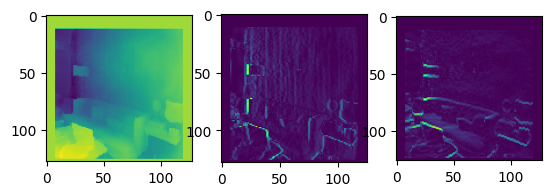

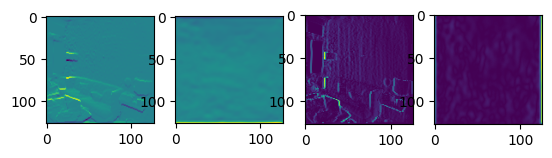

In [15]:
import matplotlib.pyplot as plt
f, (a1,a2,a3) = plt.subplots(1,3)
a1.imshow(d_diff[0][0].cpu().detach().numpy())
a2.imshow(h_gradient[0][0].cpu().detach().numpy())
a3.imshow(v_gradient[0][0].cpu().detach().numpy())

import matplotlib.pyplot as plt
f, (a1,a2,a3,a4) = plt.subplots(1,4)
a1.imshow(x_grad_gt[0][0].cpu().detach().numpy())
a2.imshow(x_grad_pr[0][0].cpu().detach().numpy())
a3.imshow(y_grad_gt[0][0].cpu().detach().numpy())
a4.imshow(y_grad_pr[0][0].cpu().detach().numpy())